
## FINANCIAL DATA
MODULE 2 | LESSON 3


---


# COMPARING AND CONTRASTING RETURNS OF DIFFERENT ASSET CLASSES

|  |  |
|:---|:---|
|**Reading Time** |  30 minutes |
|**Prior Knowledge** | Basic Python  |
|**Keywords** | Log and simple returns, Variance, Standard Deviation, Correlation, Covariance, Sharpe Ratio, Semivariance |

---


*This lesson will build upon the previous two lessons' focus on price to finally expand the conversation to returns. We go much more in depth into how to calculate returns and how to compare two investments using various risk measures.*

In [1]:
import datetime

import numpy as np
import pandas_datareader.data as web
import seaborn as sns
from IPython.display import VimeoVideo
from matplotlib import pyplot as plt

## 1. Obtaining and Transforming Financial Data 
Since this course has a more practical focus, we will start by pulling price data into Python and showing how to simply clean and transform the data so it's in a format that is easier to work with.  

We use the `pandas_datareader` library in order to pull financial data. We will pull data from the FRED (Federal Reserve Economic Data) Database. Keep in mind, we can use the `pandas_datareader` package to pull from many different sources, like OECD, Yahoo Finance, etc.

In [2]:
start = datetime.date.today() - datetime.timedelta(days=5 * 365)
end = datetime.date.today()
df = web.DataReader(["sp500", "NASDAQCOM", "CBBTCUSD"], "fred", start, end)

We've retrieved the data from the two most popular U.S. indices, the NASDAQ and S&P 500, along with the daily Bitcoin prices from the last five years. Some basic data cleaning is done here by removing nulls (weekend data). Now, we have a DataFrame containing the dates and prices of four different assets. We need to compare returns instead of prices here for a couple of reasons: 

1. Return is a scale-free summary of an investment opportunity. 
2. Returns have statistical properties that are easier to work with. (This will be discussed more in a later lesson.)  

The next question is whether to use simple returns or log returns. Using the following variables, we can define the different types of return:

$p_1 = \textrm{final value}$
$p_0 = \textrm{initial value}$

**Simple Returns Formula**

$R_{simple} = \frac{p_1 - p_0}{p_0}$

For example, if we were calculating yearly returns and on day 1, the portfolio was worth \\$100 and at the end of the year it was worth \\$125, the simple return would be

(125-100)/100 = 0.25 = 25% gain



**Log Returns Formula**

$R_{log} = ln(p_1/p_0)$

For example, if our portfolio was worth \\$100 at the start of the year and \\$80 by the end of the year, the log return would be:

ln(80/100) = -0.223 = -22.3% loss

Log returns are used in this case because it is a common assumption in many financial models that returns are normally distributed, and log returns have good mathematical properties, which make them easier to work with considering this assumption.



### 1.2 Calculate log returns, remove unused columns, and drop nulls

We need to remove the nulls for the weekend dates

In [4]:
df = df.dropna()
df["SP500"] = np.log(df.sp500) - np.log(df.sp500.shift(1))
df["NASDAQ"] = np.log(df.NASDAQCOM) - np.log(df.NASDAQCOM.shift(1))
df["Bitcoin"] = np.log(df.CBBTCUSD) - np.log(df.CBBTCUSD.shift(1))
df = df.iloc[1:, 3:]

/tmp/ipykernel_76/2457908125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SP500"] = np.log(df.sp500) - np.log(df.sp500.shift(1))
/tmp/ipykernel_76/2457908125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NASDAQ"] = np.log(df.NASDAQCOM) - np.log(df.NASDAQCOM.shift(1))
/tmp/ipykernel_76/2457908125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [5]:
df.head()

,SP500,NASDAQ,Bitcoin
DATE,,,
2017-06-28,0.008769,0.014182,-0.008825
2017-06-29,-0.008637,-0.014551,-0.009097
2017-06-30,0.001532,-0.000640,-0.030015
2017-07-03,0.002308,-0.004957,0.034908
2017-07-05,0.001452,0.006655,0.028901


### 1.3 Show summary stats for the index returns

In [6]:
df.describe()

,SP500,NASDAQ,Bitcoin
count,1255.000000,1255.000000,1255.000000
mean,0.000359,0.000480,0.001677
std,0.013095,0.015264,0.050298
min,-0.127652,-0.131490,-0.468625
25%,-0.003783,-0.005012,-0.019969
50%,0.000973,0.001215,0.001897
75%,0.006408,0.007936,0.024766
max,0.089683,0.089346,0.240606


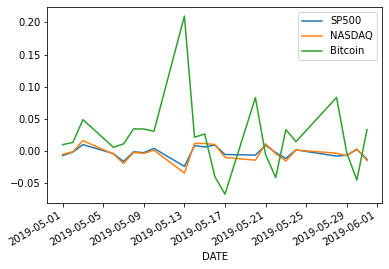

In [7]:
df["2019-05-01":"2019-05-31"].plot();

## 2. Variance and Standard Deviation 
Investors have to keep volatility in mind as well when choosing an investment. For example, a pension fund may need to be extra careful with its money and will want to ensure they aren’t getting into any extremely volatile investments. There are also hedge funds, which short stocks and even trade volatility with options. As you can see, whether you’re risk-seeking or risk-averse, the volatility (risk) of an investment is something you should care about.   

A simple measure of volatility is the variance. Variance is used to see how far away each data point in a set is away from the mean. Variance is calculated with the following steps:

Take the difference between each data point and the mean
Square each difference so that they're all positive values
Sum up the squared results
Divide this by the count of data points minus one
$\sigma^2 = \frac{\sum(x_i - \overline{x}^2)}{n-1}$

where

$\sigma^2 = \textrm{Sample Variance}$

$x_i = \textrm{value of one observation}$

$\overline{x} = \textrm{mean of all observations}$

$n = \textrm{number of observations}$

The larger the variance, the further spread out it is from the mean. Variance treats all deviations from the mean the same way, regardless of whether they are less than or greater than the mean. A variance of zero would indicate that each data point is the same.  

Standard deviation is easy to calculate once you have the variance. All you have to do is take the square root of the variance: 

$\sigma = \sqrt{\sigma^2}$	

where 

$\sigma = \textrm{standard deviation}$

Standard deviation is another commonly used statistical measure to quantify market volatility. You would expect newer growth stocks to have higher standard deviations and more established blue-chip stocks to have lower standard deviations of returns. We will illustrate this by comparing daily returns from the last five years of the S&P 500 and NASDAQ, as well as Bitcoin prices. While Bitcoin isn't necessarily a growth stock, it's still very new compared to the S&P 500 and NASDAQ, so you would expect to see bigger swings in the price when compared to those two stock indices.

This is illustrated below by taking the standard deviations of returns over the last five years. These results are as expected: Both the S&P 500 and NASDAQ have very similar daily standard deviations. Bitcoin, on the other hand, has almost five times the standard deviation of the two stock indices.

In [8]:
df.std()

SP500      0.013095
NASDAQ     0.015264
Bitcoin    0.050298
dtype: float64

We can also visualize this by graphing returns in Python using the plot method in pandas in conjunction with standardized y-axis limits so that we can ensure we're comparing returns on the same scale:

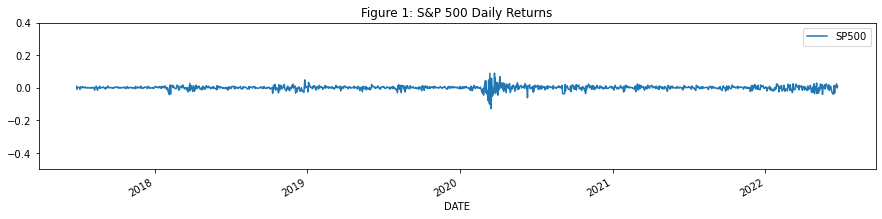

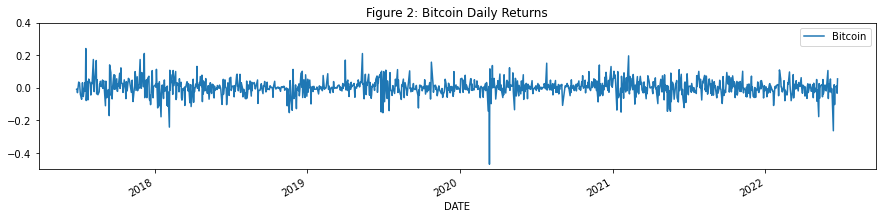

In [9]:
ax1 = df.plot(figsize=(15, 3), y="SP500", title="Figure 1: S&P 500 Daily Returns")
ax2 = df.plot(figsize=(15, 3), y="Bitcoin", title="Figure 2: Bitcoin Daily Returns")

ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

The above charts show clearly how much more volatile Bitcoin is compared to the S&P 500 and hence why the variance/standard deviation of returns is much higher.

Standard deviation is preferred over variance in most cases because variance is a squared result of the units of return. By taking the square root of this and thus obtaining standard deviation, the result is in the same unit as the underlying data, which in this case is returns. This makes it much easier to understand, intuitively.  

Keep in mind, a lower standard deviation is not necessarily preferable when considering investments. It all depends on the investor’s risk preferences. A higher risk means a higher potential for rewards. Understanding the investor’s perspective is key to determining what levels of risk an investor is comfortable with.  

In the first video of this lesson, we will compare different asset classes using standard deviation of returns.

In [10]:
VimeoVideo("706652115", h="fc2f09065c", width=600)

##### [Access video transcript here](https://drive.google.com/file/d/1veRqEUCAxGXzHz423f9r2qQNxC_JK0ol/view?usp=sharing)

## 3. Covariance and Correlation 
We are able to compare the performance of stocks that have different price levels by using returns and standard deviation. How can we look at the joint performance of two stocks? For this, we turn to covariance and correlation. We will start with covariance: 

$\frac{\sum(x_{i}-\overline{x})(y_{i}-\overline{y})}{N-1}$

where

$x_i = \textrm{value of one observation of x}$

$y_i = \textrm{value of one observation of y}$

$\overline{x} = \textrm{mean of x}$

$\overline{y} = \textrm{mean of y}$

$N = \textrm{number of observations}$


**Covariance** provides us some insight into how two variables move together. A positive covariance between stock returns would indicate that when one stock goes up, so does the other and vice versa. A negative covariance would mean that the two stocks move inversely, i.e., when one goes up, the other goes down.  

Looking at the covariance matrix below for our three assets, we can see that these assets have a positive relationship with each other. It's hard to understand much more than that with these numbers, given that the units are not standardized. 

### 3.1 Using a Covariance Matrix
While covariance is useful for determining the direction of two variables jointly, we can turn to correlation for a more standardized version of this. For now, when discussing correlation, we will use the Pearson’s correlation coefficient. The other types of correlation will be discussed in a future lesson

In [ ]:
df.cov()

### 3.2 Using the Pearson Correlation Coefficient Formula
The Pearson correlation coefficient is a measure of the strength of a linear relationship between two variables. The formula is as follows: 

$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}}$

where

$cov = \textrm{Covariance}$

$\sigma_{X} = \textrm{Standard Deviation of X}$

$\sigma_{Y} = \textrm{Standard Deviation of Y}$

Correlation is used in statistics to quantify the degree to which two variables move in a linear relation to each other. Correlation can range from –1 to 1 inclusive. A correlation of 1 means perfect correlation; the variables move exactly in tandem with one another. Perfect tandem for positive correlation means that if we know variable X increases, then variable Y also increases.  A correlation of –1 indicates perfect inverse correlation. This is also perfect tandem, but in the opposite direction.  Here, if we know variable X increases, then variable Y decreases. A correlation of 0 indicates there is no distinguishable relationship between two variables; therefore, it would be impossible to make predictions of one variable given the other. In this case, if we know variable X increases, then variable Y is equally likely to increase or decrease.

A benefit of correlation over covariance is that correlation is capped from –1 to 1 while covariance can be from –inf to inf. This makes covariance a harder statistic to understand intuitively. Correlation is also proportional, which will be shown in the video below.  

Keep in mind that a lot of models and financial concepts assume a constant correlation, but this is rarely the case. Correlation is changing over time and will likely even change if you adjust the time range from which you’re measuring correlation. 

When comparing the correlations of the assets we've been using so far, you can see it paints a clearer picture than the covariance did.

In [ ]:
round(df.corr(), 3)

All of the variables have a positive relationship, which we saw with the covariance matrix previously. Here, we can also see the strength of the relationships: The S&P 500 is strongly correlated with NASDAQ since we've obtained a 0.944 Pearson's correlation coefficient. The relationship between NASDAQ and Bitcoin is still positive but much weaker with a 0.192 Pearson's correlation coefficient. 

When we chart the returns between these variables, we can see evidence of the correlations above, visually:

In [ ]:
chart = sns.regplot(x="SP500", y="NASDAQ", data=df).set(
    title="Figure 3: Daily S&P 500 Returns vs NASDAQ Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")

plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey")

This relationship shows nearly perfect correlation. 

In [ ]:
sns.regplot(x="SP500", y="Bitcoin", data=df).set(
    title="Figure 4: Daily S&P 500 Returns vs Bitcoin Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")

plt.plot([min(df.SP500), max(df.SP500)], [0, 0], linestyle="--", color="grey")

The relationship here is much more scattered even though the relationship is still slightly positive. These were charted using the seaborn `regplot` method, which also shows confidence intervals around the regression line, as seen above.  

In the next video, we will go over how to leverage Python libraries in order to easily calculate correlation and covariance given an array of returns.

In [ ]:
VimeoVideo("706652174", h="765b5c9c8a", width=600)

##### [Access video transcript here](https://drive.google.com/file/d/1_vKay5S09R01iw9-wgvDCE5KuwetOxUd/view?usp=sharing)

Are there any statistics we can use to quantify not just return but also risk? For this, we turn to the Sharpe ratio.

### 3.3 The Sharpe Ratio 
The Sharpe ratio allows an investor to understand the relationship between the return of an investment in relation to its volatility. The formula is as follows: 

$\textrm{Sharpe Ratio} = \tfrac{R_p - R_f}{\sigma_p}$

where

$R_p = \textrm{Return of the portfolio}$

$R_f = \textrm{Risk-free Rate}$

$\sigma_p = \textrm{Standard Deviation of the Portfolio}$

In many cases with interest rates so low, investors will assume the risk-free rate to be 0, making the ratio: 

$\textrm{Sharpe Ratio} = \frac{R_p}{\sigma_p}$

Notice anything about the denominator? Yes, that’s right—we use the standard deviation here to represent risk.  

This measure is used as a way of scaling the return of an investment depending on how much risk is taken. In other words, the higher the standard deviation, the more the risk-weighted return is reduced. Let’s use the same example as above with S&P 500 and Bitcoin daily returns over the last five years.

Average daily return of S&P 500: **0.000617 = 6.17 bp**

Average daily return of Bitcoin: **0.003626 = 36.26 bp**

Using standard deviations from above and assuming the risk-free rate = 0, we can calculate the Sharpe ratio of these investments using: 

S&P 500: 0.000617/0.012115 = **0.0509** 

Bitcoin: 0.003626/0.050088 = **0.0724** 

According to the Sharpe ratio, over the last five years, Bitcoin has had a better risk-adjusted return. This is interesting because even though Bitcoin had a higher standard deviation of returns, the higher return was enough for the Sharpe ratio to deem it the better investment from a risk/return perspective.  

One major flaw with the Sharpe ratio is that it uses the standard deviation of returns in the denominator, which assumes that returns are normally distributed. This may not always—and is actually rarely—the case. This will be explored further in a future lesson.  

In [ ]:
Sharpe_Ratio_SP500 = df["SP500"].mean() / df["SP500"].std()
Sharpe_Ratio_SP500

In [ ]:
Sharpe_Ratio_Bitcoin = df["Bitcoin"].mean() / df["Bitcoin"].std()
Sharpe_Ratio_Bitcoin

How can we refine the Sharpe ratio to give an even better measure of risk-adjusted returns? Semivariance is the answer.

## 4. Semivariance 
Semivariance, a.k.a. downside risk, is a more refined version of a standard deviation. Standard deviation looks at both the upside and downside risk of an investment. Most investors, unless you’re trading short, care much more about the downside risk than the upside risk. In other words, if you bought a stock and are looking at the Sharpe ratio, you wouldn’t want this number to be penalized for how far it moves to the upside. Most of the time, an investor will be much more concerned with the downside risk of a stock.  

$\textrm{Semivariance} = \tfrac{1}{n} * \sum_{r_i < \overline{r}}^{n} (r_i - \overline{r})^2$

where

$r_i = \textrm{value of one observation}$

$\overline{r} = \textrm{mean of all observations}$

$n = \textrm{number of observations}$

Semivariance can be thought of as the standard deviation when only looking at returns below 0. This can be used to estimate the average loss a portfolio could incur, assuming normal distributions of returns.  

Conversely, if we are short a security, we could still use semivariance, but this time, it would focus on the returns that are positive. If we are short, drops in the price create upside, so we would not want to penalize this volatility in our Sharpe ratio. However, if there are large deviations in the upward direction, then this will contribute to semivariance.

In short, semivariance uses either the positive or negative returns.


In [ ]:
df[df["SP500"] < df["SP500"].mean()]["SP500"].std()

In [ ]:
df[df["Bitcoin"] < df["Bitcoin"].mean()]["Bitcoin"].std()

## 5. Conclusion

This lesson covered surface-level returns and volatility metrics to compare stocks. We also discussed downside risk measures and ways to jointly compare different financial assets. In the next lesson, we will delve into more advanced metrics modeled with different statistical distributions.